In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)
train_df['Cabin'].fillna('U', inplace=True)
test_df['Cabin'].fillna('U', inplace=True)

train_df.drop(columns=['Ticket'], inplace=True)
test_df.drop(columns=['Ticket'], inplace=True)

In [60]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1
train_df['IsAlone'] = (train_df['FamilySize'] == 1).astype(int)
test_df['IsAlone'] = (test_df['FamilySize'] == 1).astype(int)
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [61]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    object 
 10  Embarked     891 non-null    object 
 11  FamilySize   891 non-null    int64  
 12  IsAlone      891 non-null    int32  
 13  Title        891 non-null    object 
dtypes: float64(2), int32(1), int64(6), object(5)
memory usage: 94.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 

In [62]:
title_mapping = {"Mr": "Mr", "Miss": "Miss", "Mrs": "Mrs", "Master": "Master",
                 "Dr": "Rare", "Rev": "Rare", "Col": "Rare", "Major": "Rare",
                 "Mlle": "Miss", "Countess": "Rare", "Ms": "Miss", "Lady": "Rare",
                 "Jonkheer": "Rare", "Don": "Rare", "Dona": "Rare", "Mme": "Mrs",
                 "Capt": "Rare", "Sir": "Rare"}
train_df['Title'] = train_df['Title'].map(title_mapping).fillna('Rare')
test_df['Title'] = test_df['Title'].map(title_mapping).fillna('Rare')

In [63]:
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked', 'Title'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

C:\Users\prajwal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


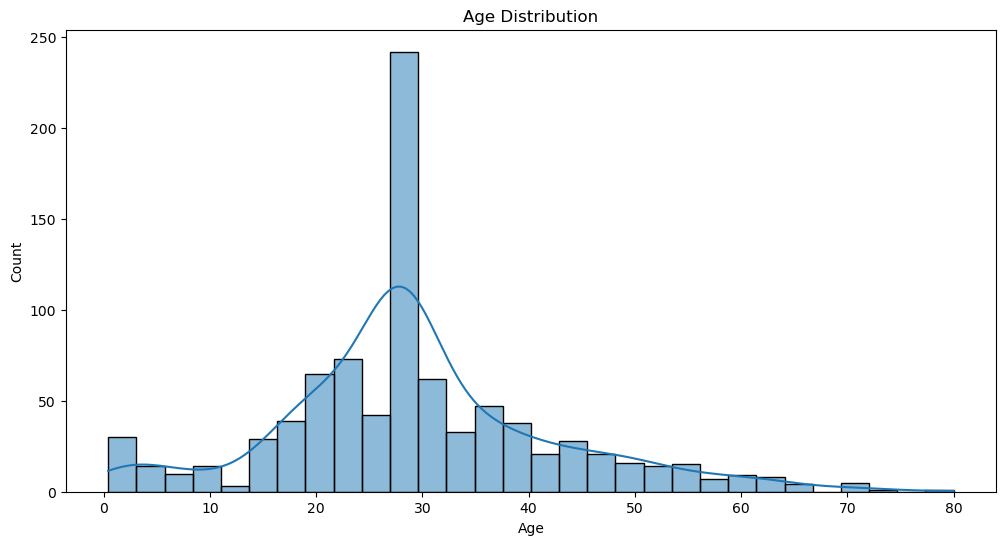

In [64]:
plt.figure(figsize=(12, 6))
sns.histplot(train_df['Age'], bins=30, kde=True).set_title('Age Distribution')
plt.show()


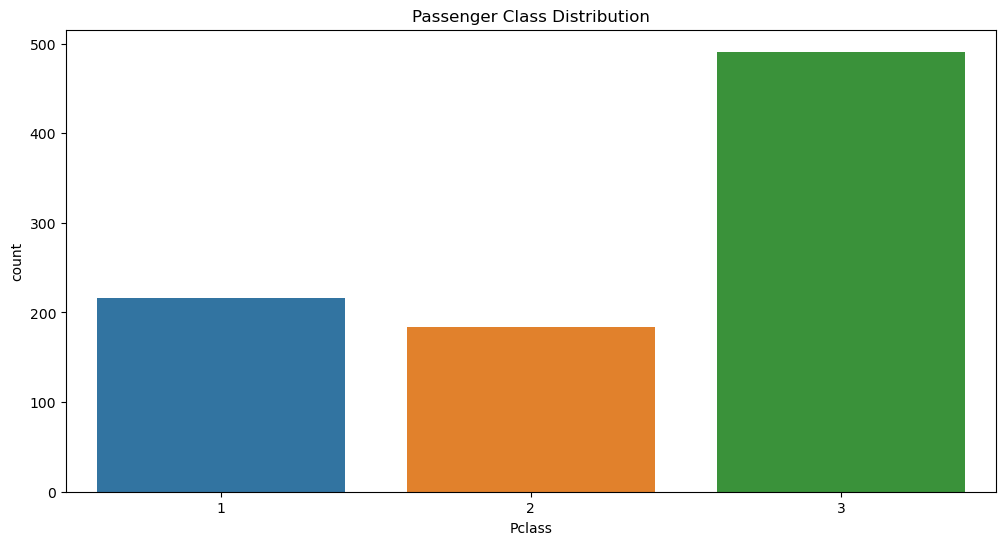

In [65]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Pclass', data=train_df).set_title('Passenger Class Distribution')
plt.show()

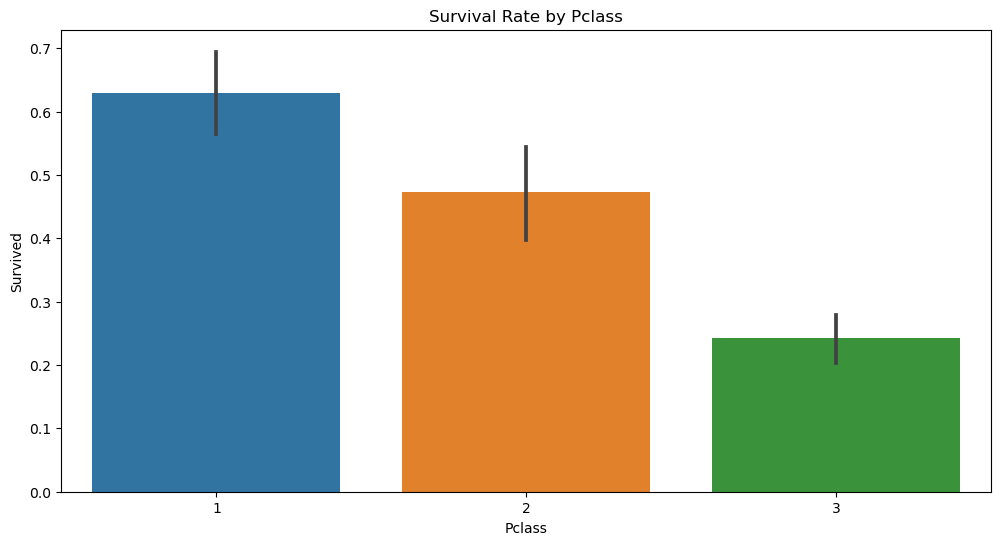

In [66]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Pclass', y='Survived', data=train_df).set_title('Survival Rate by Pclass')
plt.show()

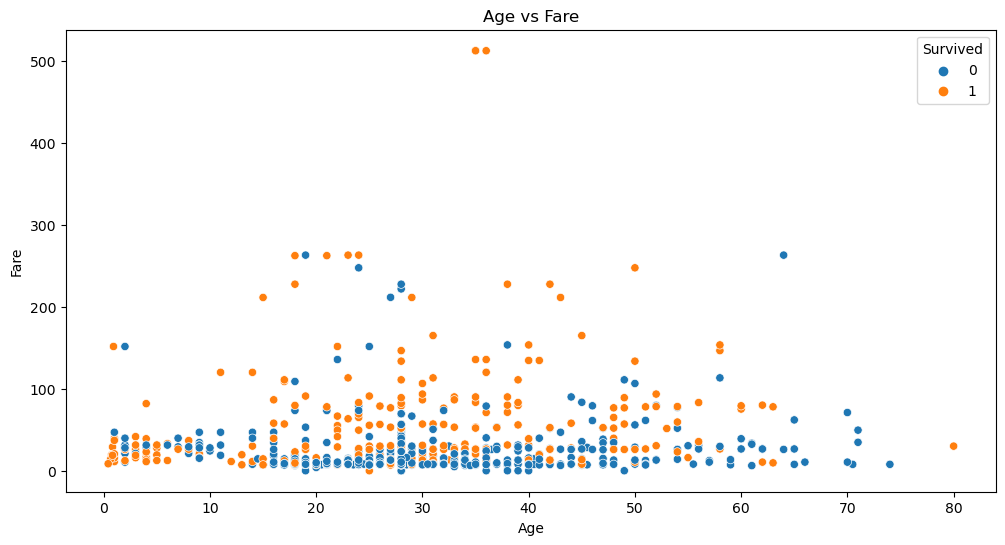

In [67]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_df).set_title('Age vs Fare')
plt.show()

C:\Users\prajwal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\prajwal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\prajwal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\prajwal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

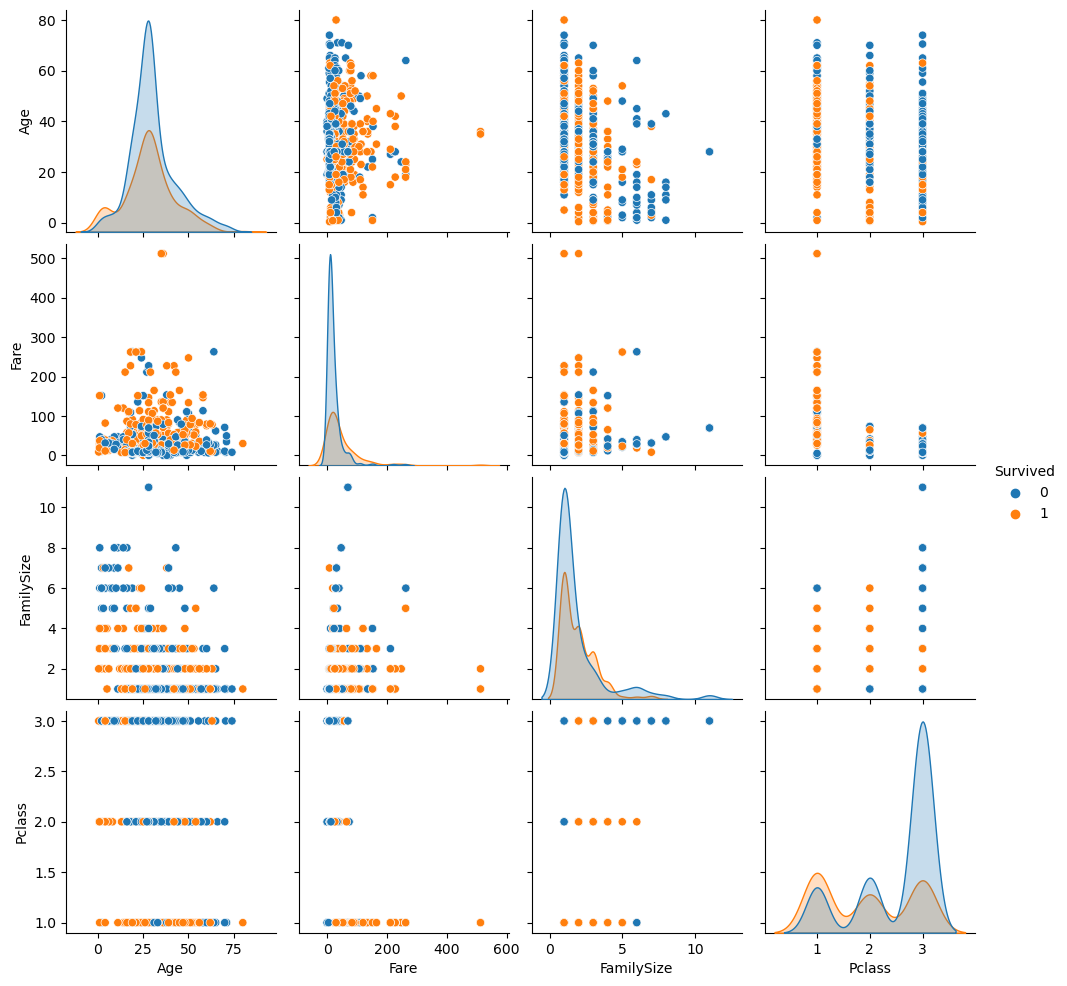

In [68]:
sns.pairplot(train_df[['Survived', 'Age', 'Fare', 'FamilySize', 'Pclass']], hue='Survived')
plt.show()

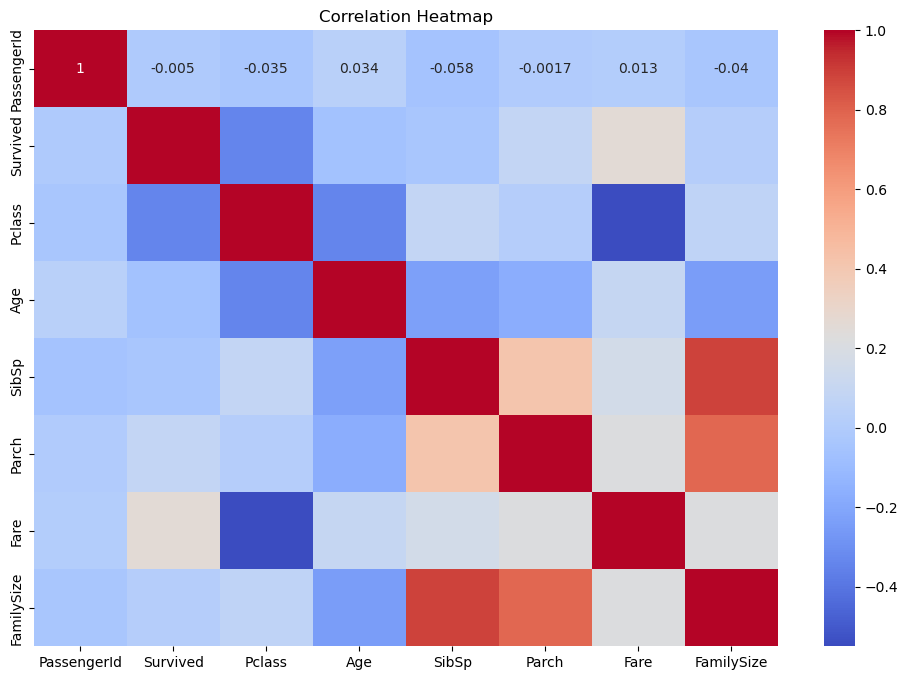

In [69]:
numeric_cols = train_df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(train_df[numeric_cols].corr(), annot=True, cmap='coolwarm').set_title('Correlation Heatmap')
plt.show()

C:\Users\prajwal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\prajwal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


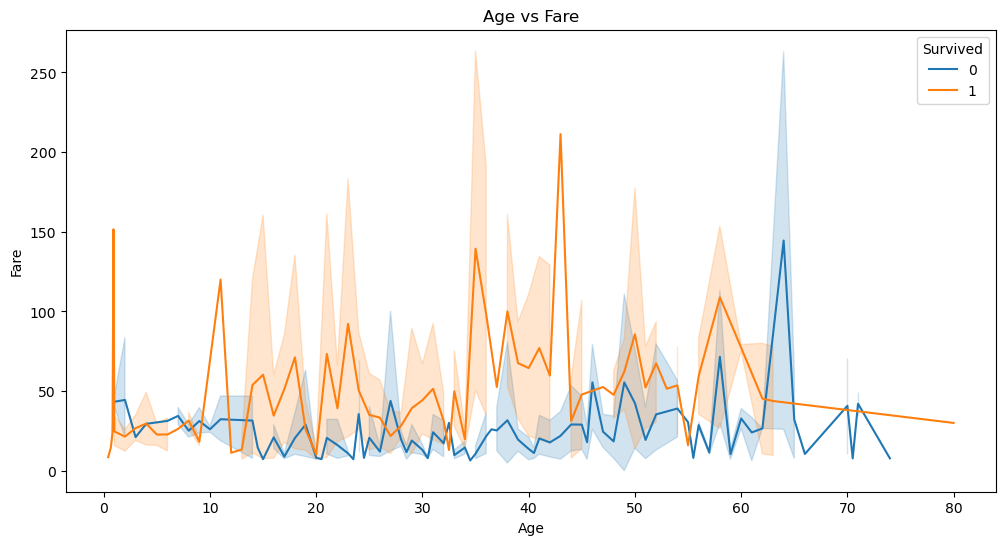

In [70]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Age', y='Fare', hue='Survived', data=train_df).set_title('Age vs Fare')
plt.show()

C:\Users\prajwal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


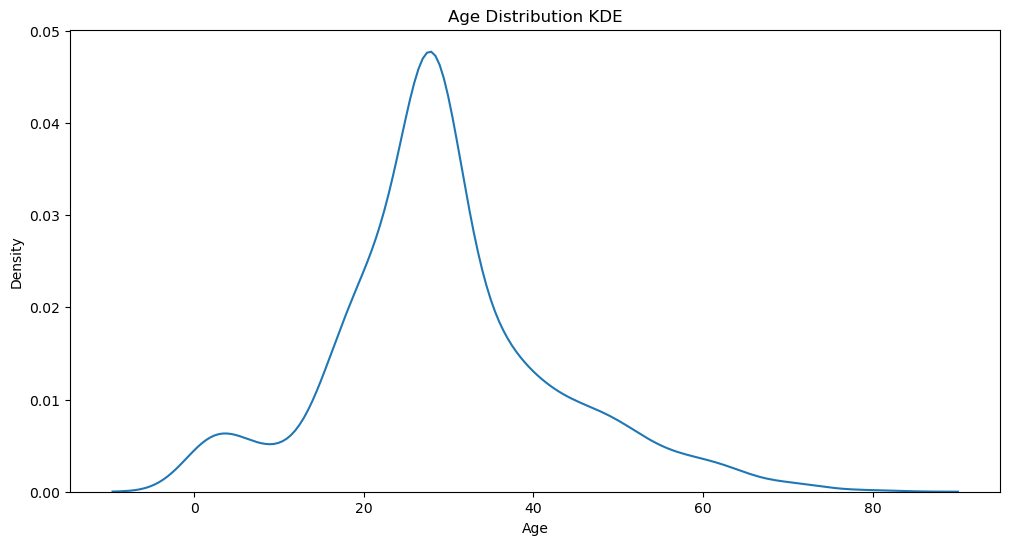

In [58]:
plt.figure(figsize=(12, 6))
sns.kdeplot(train_df['Age']).set_title('Age Distribution KDE')
plt.show()